In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin

# 1. Exploratory Data Analysis

## 1.1 Findings

- Bitcoin dataset has more dates than S&P 500 dataset because bitcoin trading runs everyday 24/7 but S&P 500 trading only happens on business days (weekdays).

- Gold prices and cpi data are recorded on the 1st of every month.

- There are missing values in four dates of bitcoin dataset.

- All three asset classes (i.e. Bitcoin, S&P 500, Gold) are in a uptrend pattern. Monthly Consumer Price Index (CPI) is also on an uptrend pattern.

In [3]:
bitcoin = pd.read_csv("sql_data/bitcoin-usd.csv")
bitcoin.head(10)

,date,open,high,low,close,volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800.0
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200.0
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700.0
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600.0
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100.0
5,2014-09-22,399.100006,406.915985,397.130005,402.152008,24127600.0
6,2014-09-23,402.092010,441.557007,396.196991,435.790985,45099500.0
7,2014-09-24,435.751007,436.112000,421.131989,423.204987,30627700.0
8,2014-09-25,423.156006,423.519989,409.467987,411.574005,26814400.0
9,2014-09-26,411.428986,414.937988,400.009003,404.424988,21460800.0


In [4]:
sp500 = pd.read_csv("sql_data/sp500.csv")
sp500.head(10)

,date,open,high,low,close,volume
0,2014-09-17,1999.300049,2010.739990,1993.290039,2001.569946,3209420000
1,2014-09-18,2003.069946,2012.339966,2003.069946,2011.359985,3235340000
2,2014-09-19,2012.739990,2019.260010,2006.589966,2010.400024,4880220000
3,2014-09-22,2009.079956,2009.079956,1991.010010,1994.290039,3349670000
4,2014-09-23,1992.780029,1995.410034,1982.770020,1982.770020,3279350000
5,2014-09-24,1983.339966,1999.790039,1978.630005,1998.300049,3313850000
6,2014-09-25,1997.319946,1997.319946,1965.989990,1965.989990,3273050000
7,2014-09-26,1966.219971,1986.369995,1966.219971,1982.849976,2929440000
8,2014-09-29,1978.959961,1981.280029,1964.040039,1977.800049,3094440000
9,2014-09-30,1978.209961,1985.170044,1968.959961,1972.290039,3951100000


In [5]:
monthly_data = pd.read_csv("sql_data/monthly_data.csv")
monthly_data.head(10)

,date,gold_usd,cpi_us
0,2014-09-01,1241.330,237.852
1,2014-10-01,1223.565,238.031
2,2014-11-01,1176.413,237.433
3,2014-12-01,1200.440,236.151
4,2015-01-01,1249.333,234.812
5,2015-02-01,1231.100,233.707
6,2015-03-01,1180.636,234.722
7,2015-04-01,1198.253,236.119
8,2015-05-01,1197.684,236.599
9,2015-06-01,1182.248,237.805


In [6]:
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2619 entries, 0 to 2618
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2619 non-null   object 
 1   open    2615 non-null   float64
 2   high    2615 non-null   float64
 3   low     2615 non-null   float64
 4   close   2615 non-null   float64
 5   volume  2615 non-null   float64
dtypes: float64(5), object(1)
memory usage: 122.9+ KB


In [7]:
monthly_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      87 non-null     object 
 1   gold_usd  87 non-null     float64
 2   cpi_us    87 non-null     float64
dtypes: float64(2), object(1)
memory usage: 2.2+ KB


In [8]:
sp500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1805 entries, 0 to 1804
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1805 non-null   object 
 1   open    1805 non-null   float64
 2   high    1805 non-null   float64
 3   low     1805 non-null   float64
 4   close   1805 non-null   float64
 5   volume  1805 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 84.7+ KB


## 1.2 Trend analysis on close price vs asset class

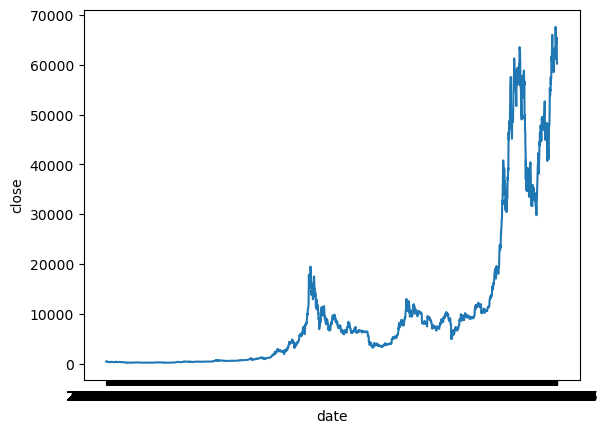

In [9]:
sns.lineplot(x='date', y='close', data=bitcoin)
plt.show()

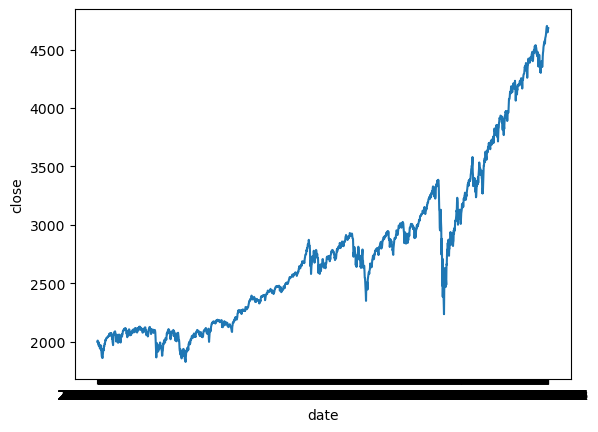

In [10]:
sns.lineplot(x='date', y='close', data=sp500)
plt.show()

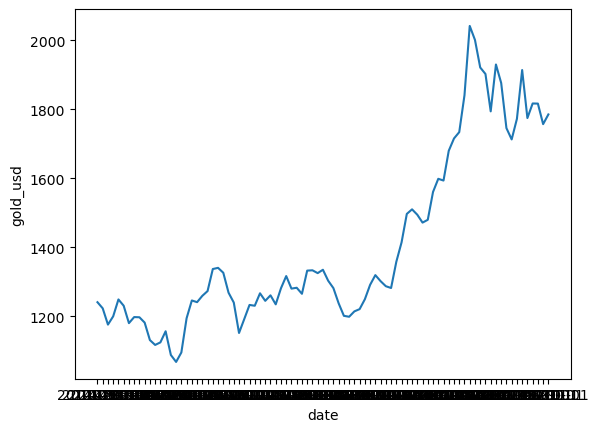

In [11]:
sns.lineplot(x='date', y='gold_usd', data=monthly_data)
plt.show()

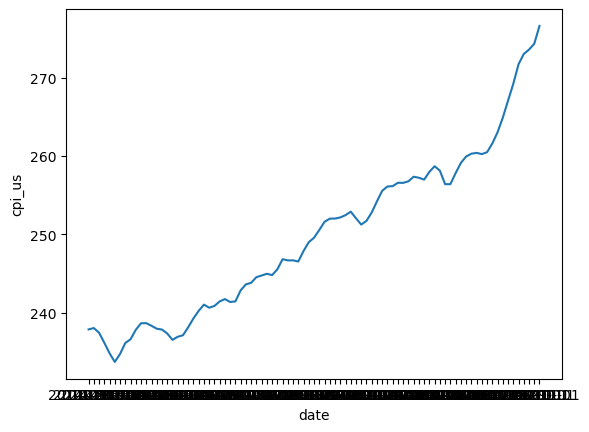

In [12]:
sns.lineplot(x='date', y='cpi_us', data=monthly_data)
plt.show()

# 2. Investigate how does the performance of bitcoin compare to S&P 500 and the price of gold.

- The average annual returns of Bitcoin, S&P 500, and Gold between Year 2014 and 2021 are **240.67%**, **11.85%**, and **1.17%**, respectively. Bitcoin outperforms S&P 500 by 20 times and gold by 200 times!

In [13]:
# Add month and year columns
bitcoin['month'] = pd.to_datetime(bitcoin['date']).dt.month
bitcoin['year'] = pd.to_datetime(bitcoin['date']).dt.year
sp500['month'] = pd.to_datetime(sp500['date']).dt.month
sp500['year'] = pd.to_datetime(sp500['date']).dt.year
monthly_data['month'] = pd.to_datetime(monthly_data['date']).dt.month
monthly_data['year'] = pd.to_datetime(monthly_data['date']).dt.year

In [14]:
bitcoin.head()

,date,open,high,low,close,volume,month,year
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800.0,9,2014
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200.0,9,2014
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700.0,9,2014
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600.0,9,2014
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100.0,9,2014


In [15]:
monthly_data.head()

,date,gold_usd,cpi_us,month,year
0,2014-09-01,1241.330,237.852,9,2014
1,2014-10-01,1223.565,238.031,10,2014
2,2014-11-01,1176.413,237.433,11,2014
3,2014-12-01,1200.440,236.151,12,2014
4,2015-01-01,1249.333,234.812,1,2015


In [16]:
# Create function to calculate percentage return each year
def calculate_percentage_return(dataframe, name):
    pct_change_list = []
    year_list = []
    for year in range(2014,2022):
        df_filtered = dataframe[dataframe['year'] == year]
        if(name == 'gold'):
            pct_change = round((df_filtered.iloc[-1, 1] / df_filtered.iloc[0, 1] - 1)*100,2)
        elif(name == 'cpi'):
            pct_change = round((df_filtered.iloc[-1, 2] / df_filtered.iloc[0, 2] - 1)*100,2)
        else:
            pct_change = round((df_filtered.iloc[-1, 4] / df_filtered.iloc[0, 1] - 1)*100,2)
        pct_change_list.append(pct_change)
        year_list.append(str(year))
    result = pd.DataFrame(data=np.array([year_list,pct_change_list]).T, columns=['year', str(name)+'_percent_change'])
    result[str(name)+'_percent_change'] = result[str(name)+'_percent_change'].astype(float)
    return result

In [17]:
btc_pct_change = calculate_percentage_return(bitcoin,'btc')
sp500_pct_change = calculate_percentage_return(sp500,'sp500')
gold_pct_change = calculate_percentage_return(monthly_data,'gold')
cpi_pct_change = calculate_percentage_return(monthly_data,'cpi')
combine = btc_pct_change.merge(sp500_pct_change, on='year')
combine = combine.merge(gold_pct_change, on='year')
combine = combine.merge(cpi_pct_change, on='year')
combine

,year,btc_percent_change,sp500_percent_change,gold_percent_change,cpi_percent_change
0,2014,-31.27,2.98,-3.29,-0.72
1,2015,34.37,-0.73,-14.49,1.07
2,2016,123.75,9.84,5.16,2.04
3,2017,1369.03,18.74,6.12,2.17
4,2018,-73.48,-6.59,-6.22,2.24
5,2019,92.00,30.43,14.59,2.38
6,2020,303.09,15.76,14.96,1.27
7,2021,107.89,24.39,-7.50,6.19


In [18]:
combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  8 non-null      object 
 1   btc_percent_change    8 non-null      float64
 2   sp500_percent_change  8 non-null      float64
 3   gold_percent_change   8 non-null      float64
 4   cpi_percent_change    8 non-null      float64
dtypes: float64(4), object(1)
memory usage: 384.0+ bytes


In [19]:
# Average return of asset class between 2014 and 2021
print("Average return of Bitcoin: {:.2f}%".format(combine['btc_percent_change'].mean()))
print("Average return of S&P 500: {:.2f}%".format(combine['sp500_percent_change'].mean()))
print("Average return of Gold: {:.2f}%".format(combine['gold_percent_change'].mean()))
print("Average change of cpi: {:.2f}%".format(combine['cpi_percent_change'].mean()))

Average return of Bitcoin: 240.67%
Average return of S&P 500: 11.85%
Average return of Gold: 1.17%
Average change of cpi: 2.08%


# 3. Investigate Bitcoin's volatility and whether Bitcoin can be used as a hedge versus inflation.

- The annualized volatility of Bitcoin is approximately __5 times higher__ than S&P 500. This means that Bitcoin is considered to be risky asset because it experience larger and faster price swings than S&P 500.
- Although Bitcoin has high percentage returns, it has significant negative returns on certain years such as 2014 (-31.27%) and 2018 (-73.48%) which are more than 10 times worst than the performance of S&P 500 and Gold.
- The inconsistent gains of Bitcoin and high volatility makes it impossible to hedge against inflation.
- In order to create a low volatility fund, it is recommended to only include S&P 500 fund or perhaps no more than 5% of portfolio allocation to Bitcoin.

In [20]:
# Create function to calculate annualized volatility
def calculate_volatility(dataframe, name):
    volatility_list = []
    year_list = []
    for year in range(2014,2022):
        df_filtered = dataframe[dataframe['year'] == year]
        if(name == 'gold'):
            df_filtered['pct_change'] = df_filtered['gold_usd'].pct_change()
        elif(name == 'cpi'):
            df_filtered['pct_change'] = df_filtered['cpi_us'].pct_change()
        else:
            df_filtered['pct_change'] = df_filtered['close'] / df_filtered['open'] - 1
        sd = df_filtered['pct_change'].std()
        volatility = np.sqrt(252) * sd
        volatility_list.append(volatility)
        year_list.append(str(year))
    result = pd.DataFrame(data=np.array([year_list,volatility_list]).T, columns=['year', str(name)+'_volatility'])
    result[str(name)+'_volatility'] = result[str(name)+'_volatility'].astype(float)
    return result

In [21]:
btc_volatility = calculate_volatility(bitcoin,'btc')
sp500_volatility = calculate_volatility(sp500,'sp500')
gold_volatility = calculate_volatility(monthly_data,'gold')
cpi_volatility = calculate_volatility(monthly_data,'cpi')
combine_vol = btc_volatility.merge(sp500_volatility, on='year')
combine_vol = combine_vol.merge(gold_volatility, on='year')
combine_vol = combine_vol.merge(cpi_volatility, on='year')
combine_vol

C:\Users\yiron\AppData\Local\Temp\ipykernel_6220\1040909534.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['pct_change'] = df_filtered['close'] / df_filtered['open'] - 1
C:\Users\yiron\AppData\Local\Temp\ipykernel_6220\1040909534.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['pct_change'] = df_filtered['close'] / df_filtered['open'] - 1
C:\Users\yiron\AppData\Local\Temp\ipykernel_6220\1040909534.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

,year,btc_volatility,sp500_volatility,gold_volatility,cpi_volatility
0,2014,0.531369,0.129504,0.470456,0.048861
1,2015,0.565328,0.145719,0.417234,0.054389
2,2016,0.395267,0.115776,0.712739,0.034607
3,2017,0.791222,0.052397,0.379252,0.035745
4,2018,0.671169,0.152452,0.291066,0.039622
5,2019,0.565096,0.093886,0.450576,0.033462
6,2020,0.599928,0.222172,0.761934,0.056217
7,2021,0.680583,0.103742,0.753392,0.040061


In [22]:
print(combine_vol['btc_volatility'].mean())
print(combine_vol['sp500_volatility'].mean())
print(combine_vol['gold_volatility'].mean())
print(combine_vol['cpi_volatility'].mean())

0.5999951238858212
0.1269559704591008
0.5295813639395859
0.042870510237008684


# 4. Can investing in Bitcoin beats Inflation?

- Assuming a 10% significance level and use the following null and alternative hypotheses:
- Null hypothesis: Investing in Bitcoin cannot beat inflation
- Alternative hypothesis: Investing in Bitcoin can beat inflation

### Hypothesis Testing Result

- The p-value obtained from the right-tailed unpaired t-test is less than the significance level. Therefore, reject the null hypothesis.


In [23]:
# Compute the monthly percentage returns of bitcoin and cpi month-on-month change
def calculate_monthly_change(dataframe, name):
    mthly_list = []
    mthly_pct_change_list = []
    for year in range(2014, 2022):
        for month in range(1, 13):
            df_mth = dataframe[dataframe['month'] == month]
            pct_change = df_mth.iloc[-1, 4] / df_mth.iloc[0, 1] - 1
            mthly_pct_change_list.append(pct_change)
            mthly_list.append(str(month) + str(year))
    result = pd.DataFrame(data=np.array([mthly_list,mthly_pct_change_list]).T, columns=['monthyear', str(name)+'_percent_change'])
    result[str(name)+'_percent_change'] = result[str(name)+'_percent_change'].astype(float)
    return result

In [24]:
btc_mthly_change = calculate_monthly_change(bitcoin, 'bitcoin')
btc_mthly_change

,monthyear,bitcoin_percent_change
0,12014,102.341893
1,22014,207.135718
2,32014,230.705741
3,42014,235.464928
4,52014,157.230968
...,...,...
91,82021,164.679685
92,92021,92.999307
93,102021,157.272285
94,112021,176.989170


In [25]:
# Compute the cpi month-on-month change
monthly_data['cpi_percent_change'] = monthly_data['cpi_us'].pct_change() * 100
monthly_data['monthyear'] = monthly_data['month'].astype('string') + monthly_data['year'].astype('string')
cpi_mthly_change = monthly_data[['monthyear', 'cpi_percent_change']]
cpi_mthly_change

,monthyear,cpi_percent_change
0,92014,NaN
1,102014,0.075257
2,112014,-0.251228
3,122014,-0.539942
4,12015,-0.567010
...,...,...
82,72021,0.929066
83,82021,0.481052
84,92021,0.206591
85,102021,0.271597


## 4.1 Hypothesis Testing

- Determine the type of test by checking the normality of each distribution
- The histogram distributions of the monthly percentage change of Bitcoin and CPI are somewhat normally distributed. This is an unpaired two-sample test because Bitcoin and CPI are two independent groups. Therefore, we will use unpaired T-test.

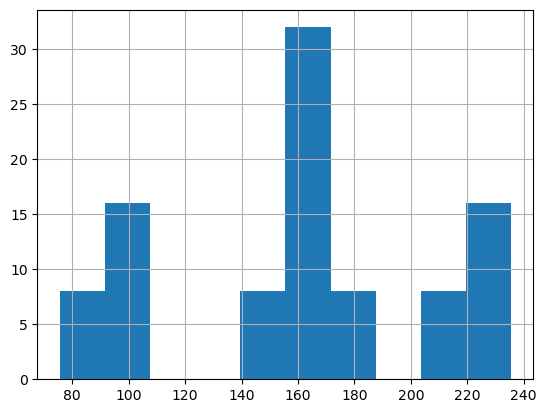

In [26]:
btc_mthly_change['bitcoin_percent_change'].hist()
plt.show()

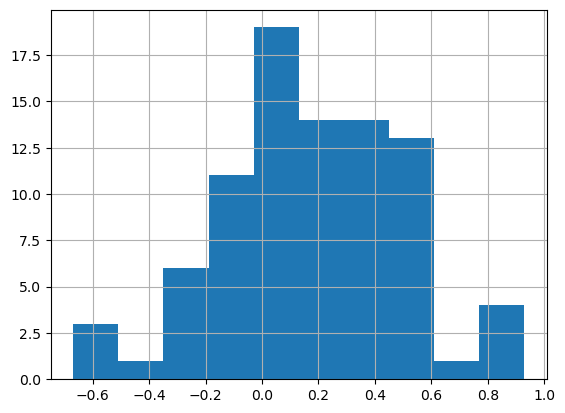

In [27]:
cpi_mthly_change['cpi_percent_change'].hist()
plt.show()

In [28]:
# Join the two dataframes
ttest_df = btc_mthly_change.merge(cpi_mthly_change, on='monthyear')
ttest_df

,monthyear,bitcoin_percent_change,cpi_percent_change
0,92014,92.999307,NaN
1,102014,157.272285,0.075257
2,112014,176.989170,-0.251228
3,122014,75.673623,-0.539942
4,12015,102.341893,-0.567010
...,...,...,...
82,72021,157.067156,0.929066
83,82021,164.679685,0.481052
84,92021,92.999307,0.206591
85,102021,157.272285,0.271597


## 4.2 Right-tailed Unpaired T-test

In [39]:
test = pingouin.ttest(x=ttest_df['bitcoin_percent_change'], y=ttest_df['cpi_percent_change'], alternative='greater')
test

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,30.441207,86.007769,greater,3.953163e-48,"[149.67, inf]",4.60205,2.188e+67,1.0


In [40]:
alpha = 0.1

if (test['p-val'][0] < 0.1):
    result = "reject null hypothesis"
else:
    result = "fail to reject null hypothesis"
    
result_dict = {"p_val": test['p-val'][0], "result": result}
print(result_dict)

{'p_val': 3.953162879757834e-48, 'result': 'reject null hypothesis'}
